<a href="https://colab.research.google.com/github/Eminent01/Baum-Tenpers-Research/blob/main/Baum_Tenper_Research.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

These colab notebook is for the algorithm implimentation of the GARCH Neural network, Linear,LASSO, Ridge and Elastic net regression

Let's first call out all the required package for the algorithm

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Importing neccesary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as date
from sklearn.linear_model import LinearRegression

Importing the Data set from the local Drive

In [ ]:
# data = pd.read_csv("/content/NSE 30 Historical Data.csv" , thousands =',')

In [ ]:
# data = pd.read_csv("/content/NSE All Share Historical Data.csv" , thousands =',')

In [ ]:
#Import the dataset for the analysis 
# data = pd.read_csv("/content/drive/MyDrive/NSE 30 Historical Data.csv" , thousands =',')

In [ ]:
# # # Import the dataset for the analysis 
data = pd.read_csv("/content/drive/MyDrive/NSE All Share Historical Data.csv" , thousands =',')

In [ ]:
# Data engineering 
data['Vol.'] = data['Vol.'].str.replace('M', "")
data['Change %'] = data['Change %'].str.replace('%', "")
data['Date'] = pd.to_datetime(data['Date'])

In [ ]:
data['Vol.'] = pd.to_numeric(data['Vol.'], errors ='coerce')
data['Change %'] = pd.to_numeric(data['Change %'], errors ='coerce')

In [ ]:
#Checking the dimension of the dataset
data.shape

(2457, 7)

In [ ]:
#Printing the first 5 rows of the dataset 
data.head(5)

,Date,Price,Open,High,Low,Vol.,Change %
0,2021-12-31,1722.30,1677.94,1723.30,1675.71,268.50,2.67
1,2021-12-30,1677.48,1677.67,1678.33,1674.86,123.11,-0.01
2,2021-12-29,1677.67,1700.61,1702.19,1674.41,75.89,-1.35
3,2021-12-24,1700.61,1699.87,1700.99,1698.59,63.63,0.13
4,2021-12-23,1698.44,1699.38,1700.27,1697.25,63.39,-0.06


In [ ]:
#Summary statistics of the data
data.describe()

,Price,Open,High,Low,Vol.,Change %
count,2457.000000,2457.000000,2457.000000,2457.000000,1156.000000,2457.000000
mean,1432.597570,1432.248433,1439.576675,1424.337566,193.019464,0.030077
std,285.008179,285.073439,286.068201,283.587090,124.748674,1.031463
min,871.260000,871.960000,884.640000,870.340000,38.030000,-5.540000
25%,1178.550000,1178.020000,1184.190000,1172.850000,109.785000,-0.450000
50%,1424.600000,1421.800000,1433.640000,1415.660000,159.710000,-0.010000
75%,1683.720000,1682.940000,1689.430000,1675.440000,238.182500,0.480000
max,2062.610000,2062.610000,2073.000000,2038.690000,970.690000,8.790000


##Exploratory Data Analysis

In [ ]:
#Correlation of the variables to check the importance of all the variables with thenprice variable
data.corr()

,Price,Open,High,Low,Vol.,Change %
Price,1.000000,0.998730,0.999504,0.999393,0.145302,0.012553
Open,0.998730,1.000000,0.999403,0.999381,0.135238,-0.036340
High,0.999504,0.999403,1.000000,0.999155,0.149434,-0.009854
Low,0.999393,0.999381,0.999155,1.000000,0.131777,-0.011766
Vol.,0.145302,0.135238,0.149434,0.131777,1.000000,0.200179
Change %,0.012553,-0.036340,-0.009854,-0.011766,0.200179,1.000000


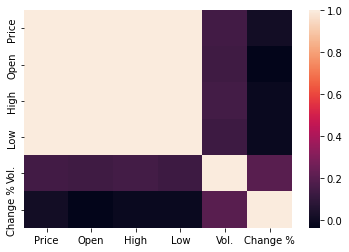

In [ ]:
#Heatmap plot 
corrmap=sns.heatmap(data.corr())

In [ ]:
## Saving the heatmap plot
plt.savefig('corrmap.jpeg')

<Figure size 432x288 with 0 Axes>

In [ ]:
#Data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2457 entries, 0 to 2456
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      2457 non-null   datetime64[ns]
 1   Price     2457 non-null   float64       
 2   Open      2457 non-null   float64       
 3   High      2457 non-null   float64       
 4   Low       2457 non-null   float64       
 5   Vol.      1156 non-null   float64       
 6   Change %  2457 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 134.5 KB


#Histogram for the price

(array([111., 286., 346., 317., 254., 258., 362., 294., 187.,  42.]),
 array([ 871.26 ,  990.395, 1109.53 , 1228.665, 1347.8  , 1466.935,
        1586.07 , 1705.205, 1824.34 , 1943.475, 2062.61 ]),
 <a list of 10 Patch objects>)

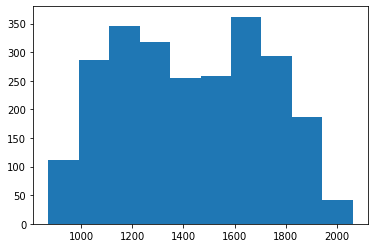

In [ ]:
plt.hist(data['Price'])

#Stock price series plot

###Data Visualization

Text(0, 0.5, 'Stock Price')

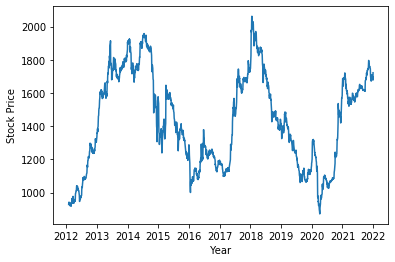

In [ ]:
plt.plot(data['Date'], data["Price"])
plt.xlabel(" Year ")
plt.ylabel("Stock Price")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


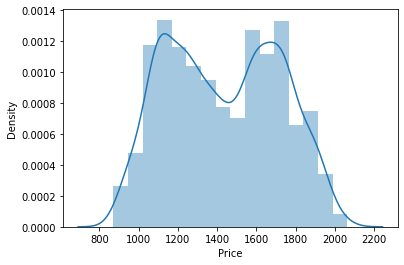

In [ ]:
sns.distplot(data['Price'])

#Price autocorrelation plot

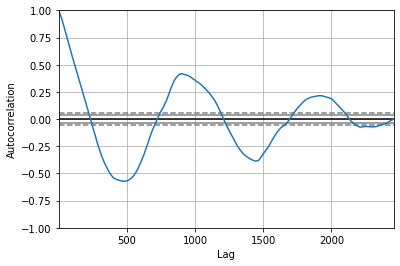

In [ ]:
# create an autocorrelation plot
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(data['Price'])

#Transformation of the data

In [ ]:
# X = data.iloc[:, 2:7]
# del X['Vol.']
# #X del (labels = 'Vol.', axis =0)
# y = data.iloc[:, 1]

In [ ]:
# data = data.drop(['Date', 'Vol.'], axis= 1)

In [ ]:
# data2 = data["Price"].pct_change().dropna()

In [ ]:
# def Logreturns(data):
#   data.loc[: , "Price"] = np.log(data.Price) - np.log(data.Price.shift(1))
#   return data

In [ ]:
# np.log10(data['Price']/data['Price'].shift(1))

In [ ]:
def Logreturns(data):
  data['Price'] = np.log10(data['Price']/data['Price'].shift(1))
  return data

In [ ]:
data2=Logreturns(data)

In [ ]:
data2.head(3)

,Date,Price,Open,High,Low,Vol.,Change %
0,2021-12-31,NaN,1677.94,1723.30,1675.71,268.50,2.67
1,2021-12-30,-0.011451,1677.67,1678.33,1674.86,123.11,-0.01
2,2021-12-29,0.000049,1700.61,1702.19,1674.41,75.89,-1.35


In [ ]:
data.head(3)

,Date,Price,Open,High,Low,Vol.,Change %
0,2021-12-31,NaN,1677.94,1723.30,1675.71,268.50,2.67
1,2021-12-30,-0.011451,1677.67,1678.33,1674.86,123.11,-0.01
2,2021-12-29,0.000049,1700.61,1702.19,1674.41,75.89,-1.35


In [ ]:
# def Antilog(data):
#   data.loc[: , "Price"] = np.log(data.Price) - np.log(data.Price.shift(1))
#   return data

In [ ]:
# data3 = Antilog(data2)
# data3.head(5)

In [ ]:
data2['year'] = pd.DatetimeIndex(data2['Date']).year
data2['month'] = pd.DatetimeIndex(data2['Date']).month
data2['day'] = pd.DatetimeIndex(data2['Date']).day

data_new = data2[  [ 'Date',  'year', 'month', 'day','Open','High','Low','Vol.', 'Change %','Price']]
data_new.head()

NameError: ignored

In [ ]:
data_new1 = data_new.drop(['Date', 'Vol.'], axis= 1)
data_new1.dropna(axis= 0, inplace = True)

In [ ]:
data_new1.head(4)

,year,month,day,Open,High,Low,Change %,Price
1,2021,12,30,1677.67,1678.33,1674.86,-0.01,-0.011451
2,2021,12,29,1700.61,1702.19,1674.41,-1.35,0.000049
3,2021,12,24,1699.87,1700.99,1698.59,0.13,0.005898
4,2021,12,23,1699.38,1700.27,1697.25,-0.06,-0.000555


In [ ]:
# X = data_new1.iloc[:, 4:8]
# # del X['Vol.']
# #X del (labels = 'Vol.', axis =0)
# y = data_new1.iloc[:, 3]

#Plots after data transformation

Text(0, 0.5, 'Stock Price')

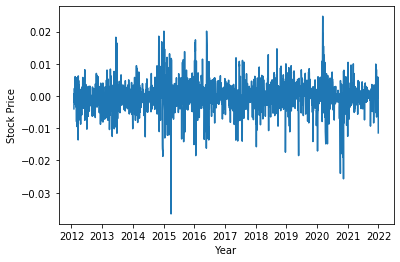

In [ ]:
plt.plot(data['Date'], data_new['Price'])
plt.xlabel(" Year ")
plt.ylabel("Stock Price")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


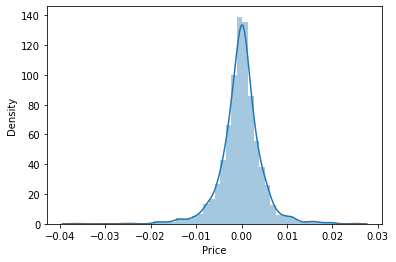

In [ ]:
sns.distplot(data_new['Price'])

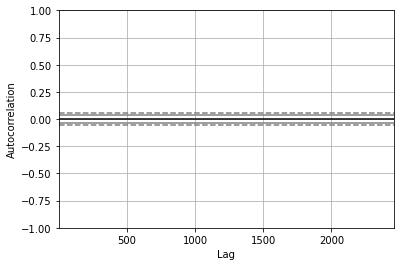

In [ ]:
# create an autocorrelation plot after standardizing with log return function
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(data_new['Price'])

Text(0, 0.5, 'Stock Price')

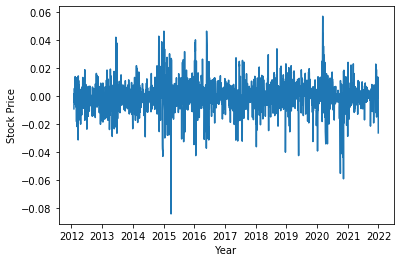

In [ ]:
plt.plot(data_new['Date'], data_new['Price'])
plt.xlabel(" Year ")
plt.ylabel("Stock Price")

Splitting of the data into training and test

In [ ]:
# data3 = data2.drop(['Date', 'Vol.'], axis= 1)
# data3.dropna(axis= 0, inplace = True)

In [ ]:
# data3.head(3)

In [ ]:
# X = data_new1.iloc[:,:-1]
# # # del X['Vol.']
# # #X del (labels = 'Vol.', axis =0)
# y = data_new1.iloc[:, -1]

In [ ]:
n_points = len(data_new1)
train_points = int((2/3)*n_points)+1
X_train, X_test =data_new1.iloc[:,:-1].values[:train_points],  data_new1.iloc[:,:-1].values[train_points:  ]
y_train, y_test =data_new1.iloc[:,0].values[:train_points  ],  data_new1.iloc[:,0].values[train_points:  ]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# n_points = len(data)
# train_points = int(2/3*n_points)+1
# X_train, X_test =X.iloc[:,1:].values[:train_points],  X.iloc[:,1:].values[train_points:  ]
# y_train, y_test =y.iloc[:,0].values[:train_points],  y.iloc[:,0].values[train_points:  ]

In [ ]:
# X_train , X_test, y_train, y_test =train_test_split(X,y ,train_size=0.6, shuffle=True, random_state=0)

In [ ]:
X_train.shape , X_test.shape, y_train.shape, y_test.shape

((1638, 7), (818, 7), (1638,), (818,))

#Import the required packages for model building

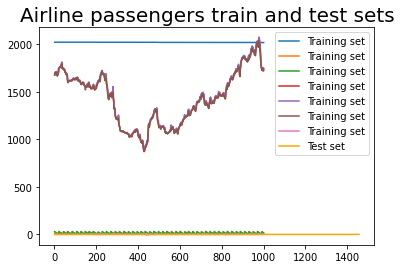

In [ ]:
test_size = 1000

data_new1_train = data_new1.iloc[:test_size, :-1]
data_new1_test = data_new1.iloc[:-test_size, -1]

plt.title('Airline passengers train and test sets', size=20)
plt.plot(data_new1_train, label='Training set')
plt.plot(data_new1_test, label='Test set', color='orange')
plt.legend();

In [ ]:
# X_train, X_test ,y_train, y_test =train_test_split(X,y,test_size=0.2, shuffle=False)

In [ ]:
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt

#Linear Regression

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)
pred_train_lr= lr.predict(X_train)
print("Train error :", np.sqrt(mean_squared_error(y_train,pred_train_lr)))
pred_test_lr= lr.predict(X_test)
print("Test Error:", np.sqrt(mean_squared_error(y_test,pred_test_lr)))
print(f' Rsquare:{r2_score(y_train, pred_train_lr)}')
print(f'Rsquare:{r2_score(y_test, pred_test_lr)}')
print(f'MAE:{mean_absolute_error(y_train, pred_train_lr)}')
print(f'MAE:{mean_absolute_error(y_test, pred_test_lr)}')

Train error : 0.0
Test Error: 0.0
 Rsquare:1.0
Rsquare:1.0
MAE:0.0
MAE:0.0


In [ ]:
len(pred_train_lr)

1639

In [ ]:
LinearPredict = lr.predict(X_test)

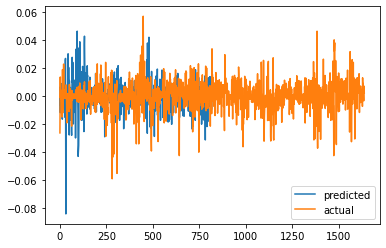

In [ ]:
plt.plot(LinearPredict, label='predicted')
plt.plot(y_train, label ='actual')
plt.legend()

In [ ]:
# LinearPredict = lr.predict(X_test)

# # Plot regression against actual data
# plt.figure(figsize=(12, 6))
# plt.plot(X_train, y_train, 'o', label ="Actual train value")           # scatter plot showing actual data
# # plt.plot(X_train, LinearPredict, 'r', linewidth=2, label= "predicted train value")   # regression line
# plt.xlabel('X')
# plt.ylabel('y')
# plt.legend()
# plt.title('X vs y')

# plt.show()

In [ ]:
# def Antilog(data):
#   data.loc[: , "Price"] = np.log(data.Price) - np.log(data.Price.shift(1))
#   return data

#Ridge

In [ ]:
ridge = Ridge(alpha=0.01)
ridge.fit(X_train, y_train) 
pred_train_ridge= ridge.predict(X_train)
print("Train error: ", np.sqrt(mean_squared_error(y_train,pred_train_ridge)))
pred_test_ridge= ridge.predict(X_test)
print("Test error: ",np.sqrt(mean_squared_error(y_test,pred_test_ridge))) 
print(r2_score(y_train, pred_train_ridge))
print(r2_score(y_test, pred_test_ridge))
print(f'MAE:{mean_absolute_error(y_train, pred_train_ridge)}')
print(f'MAE:{mean_absolute_error(y_test, pred_test_ridge)}')

Train error:  0.000590872146867252
Test error:  0.0006173772927202886
0.9965575406286223
0.9966740368424968
MAE:0.0004077427039732988
MAE:0.00043094030198489785


#LASSO

In [ ]:
model_lasso = Lasso(alpha=0.01)
model_lasso.fit(X_train, y_train) 
pred_train_lasso= model_lasso.predict(X_train)
print("Train error:",np.sqrt(mean_squared_error(y_train,pred_train_lasso)))
pred_test_lasso= model_lasso.predict(X_test)
print("Test error:",  np.sqrt(mean_squared_error(y_test,pred_test_lasso))) 
print(r2_score(y_train, pred_train_lasso))
print(r2_score(y_test, pred_test_lasso))
print(f'MAE:{mean_absolute_error(y_train, pred_train_lasso)}')
print(f'MAE:{mean_absolute_error(y_test, pred_test_lasso)}')

Train error: 0.01005121990938642
Test error: 0.010683022025937596
0.0038623918132038026
0.004126037401651073
MAE:0.00679252565797572
MAE:0.007298716736262277


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.424e-05, tolerance: 1.661e-05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


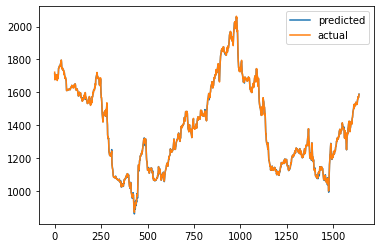

In [ ]:
plt.plot(pred_train_lasso, label='predicted')
plt.plot(y_train, label ='actual')
plt.legend()

#Elastic Net

In [ ]:
model_enet = ElasticNet(alpha = 0.01)
model_enet.fit(X_train, y_train) 
pred_train_enet= model_enet.predict(X_train)
print("Train error: ", np.sqrt(mean_squared_error(y_train,pred_train_enet)))
pred_test_enet= model_enet.predict(X_test)
print("Test error:",np.sqrt(mean_squared_error(y_test,pred_test_enet)))
print(r2_score(y_train, pred_train_enet))
print(r2_score(y_test, pred_test_enet))
print(f'MAE:{mean_absolute_error(y_train, pred_train_enet)}')
print(f'MAE:{mean_absolute_error(y_test, pred_test_enet)}')

Train error:  2.8814662772684545
Test error: 4.489074182675652
0.9998749772783796
0.9997970118603431
MAE:1.6141136434519114
MAE:2.7598038478699545


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Ridge
# load the dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
dataframe = read_csv(url, header=None)
data = dataframe.values
X, y = data[:, :-1], data[:, -1]
# define model
model = Ridge(alpha=1.0)
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (mean(scores), std(scores)))

# Model Improvement

#Cross Validation

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import absolute


In [ ]:
X = data_new1.iloc[:,1:]
y = data_new1.iloc[:,0]

###Improved model for LASSO

In [ ]:
#define cross-validation method to use
cv = KFold(n_splits=2456, random_state=None, shuffle=False)

#build multiple linear regression model
model2 = Lasso()

#use k-fold CV to evaluate model
scores = cross_val_score(model2, X, y, scoring='neg_mean_squared_error',
                         cv=cv, n_jobs=-1)

#view mean absolute error
sqrt(mean(absolute(scores)))

2.8536100311925514

###Improved model for Linear Regression

In [ ]:
#define cross-validation method to use
cv = KFold(n_splits=2456, random_state=None, shuffle=False)

#build multiple linear regression model
model2 = LinearRegression()

#use k-fold CV to evaluate model
scores = cross_val_score(model2, X, y, scoring='neg_mean_squared_error',
                         cv=cv, n_jobs=-1)

#view mean absolute error
sqrt(mean(absolute(scores)))

2.8506804721094245

###Improved model for Rigde

In [ ]:
#define cross-validation method to use
cv = KFold(n_splits=2456, random_state=None, shuffle=False)

#build multiple linear regression model
model2 = Ridge()

#use k-fold CV to evaluate model
scores = cross_val_score(model2, X, y, scoring='neg_mean_squared_error',
                         cv=cv, n_jobs=-1)

#view mean absolute error
sqrt(mean(absolute(scores)))

2.8506709088340623

(array([255.97528649]), array([1.29369965e-57]))

#GARCH NN

In [ ]:
# #Import the dataset for the analysis 
# data1 = pd.read_csv("/content/log_data.csv" , thousands =',')

In [ ]:
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
res = sm.tsa.ARMA(data["Price"], (1,1)).fit(disp=-1)

In [ ]:
#perform Ljung-Box test on residuals with lag=5
sm.stats.acorr_ljungbox(res.resid, lags=[5])

(array([19.86032735]), array([0.00132744]))

In [ ]:
!pip install arch

     |████████████████████████████████| 902 kB 5.3 MB/s 
     |████████████████████████████████| 9.8 MB 36.9 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
from arch.__future__ import reindexing

In [ ]:
from arch import arch_model

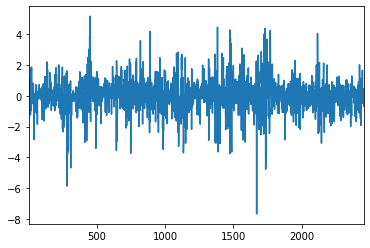

In [ ]:
import datetime as dt

import arch.data.sp500

st = dt.datetime(2012, 1, 1)
en = dt.datetime(2021, 1, 12)
# data = arch.data.sp500.load()
market = data["Price"]
returns = 100 * market.pct_change().dropna()
ax = returns.plot()
xlim = ax.set_xlim(returns.index.min(), returns.index.max())

In [ ]:
returns.describe()

count    2456.000000
mean       -0.019878
std         1.027465
min        -8.078780
25%        -0.474266
50%         0.006983
75%         0.454313
max         5.863704
Name: Price, dtype: float64

In [ ]:
returns.to_csv("log1.csv", index= False)

In [ ]:
# n_test = 10
# train, test = returns[:-n_test], returns[-n_test:]

GARCH with constant Mean ; distribution = Normal

In [ ]:
from arch import arch_model
am = arch_model(train, vol='Garch', p=1, o=0, q=1, dist='Normal', rescale= True, mean='Zero')
# am = arch_model(returns,dist="StudentsT")
res = am.fit(update_freq=5)
print(res.summary())

Iteration:      5,   Func. Count:     31,   Neg. LLF: 3119.7245892768724
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 3119.670111417554
            Iterations: 9
            Function evaluations: 51
            Gradient evaluations: 9
                       Zero Mean - GARCH Model Results                        
Dep. Variable:                  Price   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -3119.67
Distribution:                  Normal   AIC:                           6245.34
Method:            Maximum Likelihood   BIC:                           6262.75
                                        No. Observations:                 2445
Date:                Sat, Apr 09 2022   Df Residuals:                     2445
Time:                        10:26:33   Df Model:                            0
        

In [ ]:
#fitting the model
# model_fit = am.fit()
# forecast the test set
yhat = model_fit.forecast(horizon=n_test)
yhat

In [ ]:
# print("Train error: ", np.sqrt(mean_squared_error(train,yhat)))
# pred_test_enet= model_enet.predict(X_test)
# print("Test error:",np.sqrt(mean_squared_error(y_test,pred_test_enet)))

In [ ]:
# bic_garch = []
# for p in range(1, 5):
#   for q in range(1, 5):
#     garch = arch_model(returns, mean='zero',vol='GARCH', p=p, o=0, q=q)\
#             .fit(disp='off')
#     bic_garch.append(garch.bic)
#     if garch.bic == np.min(bic_garch):
#       best_param = p, q
# garch = arch_model(returns, mean='zero', vol='GARCH',
#                 p=best_param[0], o=0, q=best_param[1])\
#       .fit(disp='off')
# print(garch.summary())
# forecast = garch.forecast(start=split_date[0])
# forecast_garch = forecast

In [ ]:
# forecasts_irfm = am.forecast(horizon=5)
forecasts =res.forecast(horizon = 5, reindex = False)
print(forecasts.variance.dropna().head())

GARCH with constant Mean ; distribution = Student T

In [ ]:
am2 = arch_model(returns, vol='Garch', p=1, o=0, q=1,dist="StudentsT", rescale= True, mean='Zero')
# am = arch_model(returns,dist="StudentsT")
res = am2.fit(update_freq=5)
print(res.summary())

Iteration:      5,   Func. Count:     35,   Neg. LLF: 2982.9874134873644
Iteration:     10,   Func. Count:     69,   Neg. LLF: 2976.251198158484
Iteration:     15,   Func. Count:     99,   Neg. LLF: 2975.05407942351
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 2975.0538770571625
            Iterations: 17
            Function evaluations: 111
            Gradient evaluations: 17
                          Zero Mean - GARCH Model Results                           
Dep. Variable:                        Price   R-squared:                       0.000
Mean Model:                       Zero Mean   Adj. R-squared:                  0.000
Vol Model:                            GARCH   Log-Likelihood:               -2975.05
Distribution:      Standardized Student's t   AIC:                           5958.11
Method:                  Maximum Likelihood   BIC:                           5981.33
                                              No. Observations

EGARCH with Normal Distribution

In [ ]:
from arch import arch_model
am = arch_model(train, vol='EGarch', p=1, o=0, q=1, dist='Normal', rescale= True, mean='constant')
# am = arch_model(returns,dist="StudentsT")
res = am.fit(update_freq=5)
print(res.summary())

Iteration:      5,   Func. Count:     43,   Neg. LLF: 3112.6806161319737
Iteration:     10,   Func. Count:     74,   Neg. LLF: 3111.045525158113
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 3111.0455213787877
            Iterations: 12
            Function evaluations: 91
            Gradient evaluations: 12
                     Constant Mean - EGARCH Model Results                     
Dep. Variable:                  Price   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                     EGARCH   Log-Likelihood:               -3111.05
Distribution:                  Normal   AIC:                           6230.09
Method:            Maximum Likelihood   BIC:                           6253.30
                                        No. Observations:                 2445
Date:                Sat, Apr 09 2022   Df Residuals:                     2444
Time:       

EGARCH with Student T Distribution

In [ ]:
am2 = arch_model(train, vol='EGarch', p=1, o=0, q=1,dist="StudentsT", rescale= False, mean='constant')
# am = arch_model(returns,dist="StudentsT")
res = am2.fit(update_freq=5)
print(res.summary())

Iteration:      5,   Func. Count:     48,   Neg. LLF: 2979.0638949096847
Iteration:     10,   Func. Count:     88,   Neg. LLF: 2964.184836811527
Iteration:     15,   Func. Count:    125,   Neg. LLF: 2960.3109859290194
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 2960.2721456032427
            Iterations: 19
            Function evaluations: 153
            Gradient evaluations: 19
                        Constant Mean - EGARCH Model Results                        
Dep. Variable:                        Price   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                           EGARCH   Log-Likelihood:               -2960.27
Distribution:      Standardized Student's t   AIC:                           5930.54
Method:                  Maximum Likelihood   BIC:                           5959.55
                                              No. Observatio

GJR GARCH with Normal distribution

In [ ]:
am = arch_model(returns, p=1, o=1, q=1,dist="Normal")
res = am.fit(update_freq=5, disp="off")
print(res.summary())

                   Constant Mean - GJR-GARCH Model Results                    
Dep. Variable:                  Price   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                  GJR-GARCH   Log-Likelihood:               -3126.95
Distribution:                  Normal   AIC:                           6263.89
Method:            Maximum Likelihood   BIC:                           6292.92
                                        No. Observations:                 2455
Date:                Fri, Apr 08 2022   Df Residuals:                     2454
Time:                        13:07:50   Df Model:                            1
                                  Mean Model                                  
                  coef    std err          t      P>|t|       95.0% Conf. Int.
------------------------------------------------------------------------------
mu         -1.3158e-04  1.766e-02 -7.452e-03      0.

GJR GARCH with Student T distribution

In [ ]:
am = arch_model(returns, p=1, o=1, q=1,dist="StudentsT")
res = am.fit(update_freq=5, disp="off")
print(res.summary())

                      Constant Mean - GJR-GARCH Model Results                       
Dep. Variable:                        Price   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                        GJR-GARCH   Log-Likelihood:               -2974.08
Distribution:      Standardized Student's t   AIC:                           5960.16
Method:                  Maximum Likelihood   BIC:                           5995.00
                                              No. Observations:                 2455
Date:                      Fri, Apr 08 2022   Df Residuals:                     2454
Time:                              13:07:57   Df Model:                            1
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
m

In [ ]:
from arch import arch_model
am = arch_model(returns,p=1, o=0, q=1, dist='Normal', mean='constant',rescale= True, power=1.0)
# am = arch_model(returns,dist="StudentsT")
res = am.fit(update_freq=5)
print(res.summary())

Iteration:      5,   Func. Count:     38,   Neg. LLF: 3135.2663226703053
Iteration:     10,   Func. Count:     72,   Neg. LLF: 3120.033051893739
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 3120.030178868511
            Iterations: 13
            Function evaluations: 91
            Gradient evaluations: 13
                    Constant Mean - AVGARCH Model Results                     
Dep. Variable:                  Price   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                    AVGARCH   Log-Likelihood:               -3120.03
Distribution:                  Normal   AIC:                           6248.06
Method:            Maximum Likelihood   BIC:                           6271.28
                                        No. Observations:                 2455
Date:                Sat, Apr 09 2022   Df Residuals:                     2454
Time:        

In [ ]:
from arch import arch_model
am = arch_model(returns,p=1, o=0, q=1, dist='StudentsT', mean='constant',rescale= True, power=1.0)
# am = arch_model(returns,dist="StudentsT")
res = am.fit(update_freq=5)
print(res.summary())

Iteration:      5,   Func. Count:     43,   Neg. LLF: 2989.389691948121
Iteration:     10,   Func. Count:     83,   Neg. LLF: 2966.460126880669
Iteration:     15,   Func. Count:    122,   Neg. LLF: 2965.394279697516
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 2965.3942246979946
            Iterations: 18
            Function evaluations: 147
            Gradient evaluations: 18
                       Constant Mean - AVGARCH Model Results                        
Dep. Variable:                        Price   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                          AVGARCH   Log-Likelihood:               -2965.39
Distribution:      Standardized Student's t   AIC:                           5940.79
Method:                  Maximum Likelihood   BIC:                           5969.82
                                              No. Observations